In [1]:
#https://xavierbourretsicotte.github.io/Kernel_feature_map.html

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
from IPython.display import HTML, Image

%matplotlib inline
sns.set()

from sklearn.datasets.samples_generator import make_circles

C:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
# Sum of polynomials

In [4]:
def feature_map_1(X):
    return np.asarray((X[:,0], X[:,1], X[:,0]**2 + X[:,1]**2)).T

Text(0.5, 0.92, 'Transformed dataset')

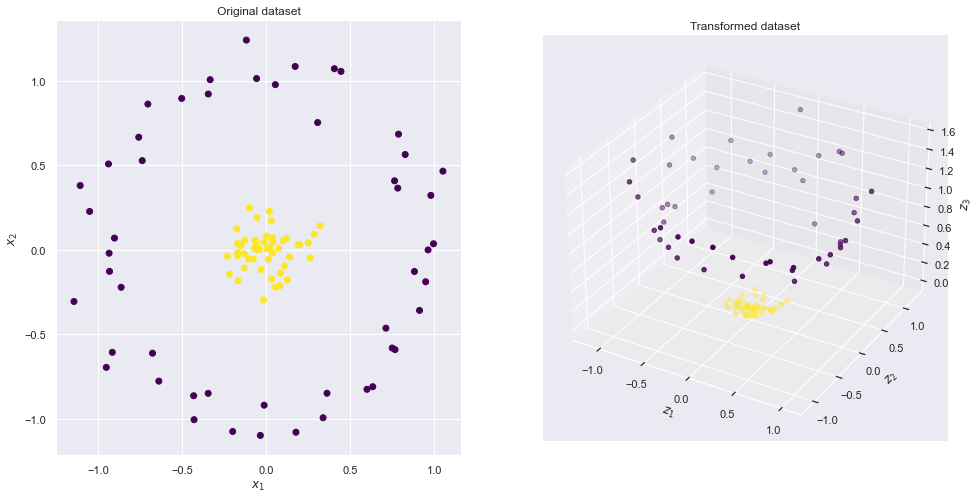

In [5]:
#Generate dataset and feature-map
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)
Z = feature_map_1(X)

#2D scatter plot
fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.scatter(X[:,0], X[:,1], c = y, cmap = 'viridis')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_title('Original dataset')

#3D scatter plot
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter3D(Z[:,0],Z[:,1], Z[:,2],c = y, cmap = 'viridis' ) #,rstride = 5, cstride = 5, cmap = 'jet', alpha = .4, edgecolor = 'none' )
ax.set_xlabel('$z_1$')
ax.set_ylabel('$z_2$')
ax.set_zlabel('$z_3$')
ax.set_title('Transformed dataset')

In [6]:
#Gaussian Radial Basis Function (RBF) centered at 0,0

In [7]:
def feature_map_2(X):  
    return np.asarray((X[:,0], X[:,1], np.exp( -( X[:,0]**2 + X[:,1]**2)))).T

Text(0.5, 0.92, 'Transformed dataset')

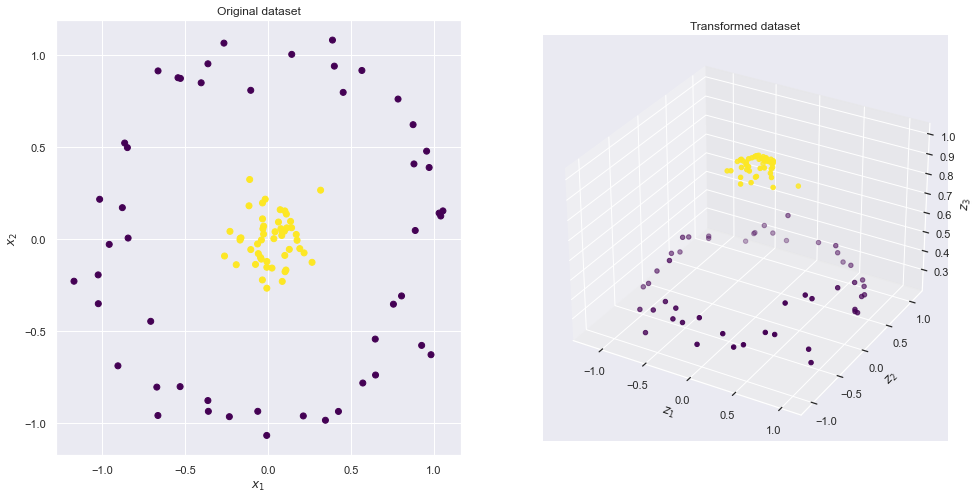

In [8]:
#Generate dataset and feature-map
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)
Z = feature_map_2(X)

#2D scatter plot
fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.scatter(X[:,0], X[:,1], c = y, cmap = 'viridis')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_title('Original dataset')

#3D scatter plot
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter3D(Z[:,0],Z[:,1], Z[:,2],c = y, cmap = 'viridis' ) #,rstride = 5, cstride = 5, cmap = 'jet', alpha = .4, edgecolor = 'none' )
ax.set_xlabel('$z_1$')
ax.set_ylabel('$z_2$')
ax.set_zlabel('$z_3$')
ax.set_title('Transformed dataset')

In [9]:
#also a polynomial kernel

In [10]:
def feature_map_3(X):  
    return np.asarray(( np.sqrt(2) *X[:,0] * X[:,1], X[:,0]**2, X[:,1]**2)).T

w= [-0.05481854 -2.53191791 -2.52028513] b= [1.14976292]


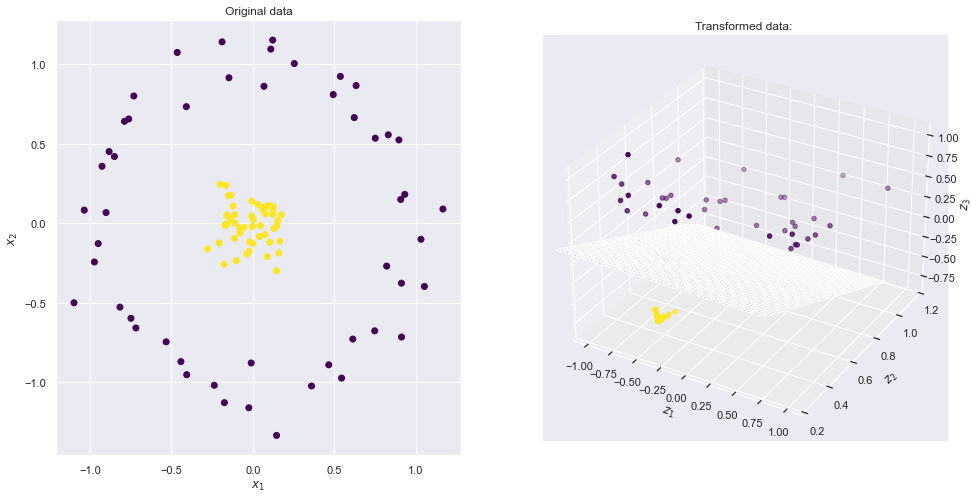

In [11]:
from sklearn.svm import SVC
#Generate dataset and feature-map
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1, random_state = 0)
Z = feature_map_3(X)

#2D scatter plot
fig = plt.figure(figsize = (16,8))
ax = fig.add_subplot(1, 2, 1)
ax.scatter(X[:,0], X[:,1], c = y, cmap = 'viridis')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_title('Original data')

#3D scatter plot
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter3D(Z[:,0],Z[:,1], Z[:,2],c = y, cmap = 'viridis' ) #,rstride = 5, cstride = 5, cmap = 'jet', alpha = .4, edgecolor = 'none' )
ax.set_xlabel('$z_1$')
ax.set_ylabel('$z_2$')
ax.set_zlabel('$z_3$')
ax.set_title('Transformed data: ')

#SVM using kernel 3 - feature map 3
clf = SVC(C = 1, kernel = 'linear')
clf.fit(Z, y) 

w = clf.coef_.flatten()
b = clf.intercept_.flatten()
print('w=',w,'b=',b)

# create x,y
xx, yy = np.meshgrid(np.linspace(-1,1), np.linspace(0,1))

# calculate corresponding z
boundary = (-w[0] * xx - w[1] * yy - b) * 1. /w[2]


# plot the surface

ax.plot_surface(xx, yy, boundary, alpha = .3)
ax.set_ylim(.2,1.2)
ax.set_zlim(-.9,1.1)
#ax.view_init(0, 260)

plt.show()

In [12]:
#Sklearn implementation of SVC with Gram matrix

In [13]:
from sklearn import svm
from sklearn.metrics import accuracy_score

clf = svm.SVC(kernel='precomputed')
# kernel computation
gram = np.dot(feature_map_2(X), feature_map_2(X).T)
clf.fit(gram, y) 

# prediction errors on training examples
np.sum(y - clf.predict(gram))

0

In [14]:
#Sklearn implementation using custom Kernel

In [15]:
def my_kernel_1(X,Y):
    return np.dot(feature_map_1(X),feature_map_1(Y).T )

def my_kernel_2(X,Y):
    return np.dot(feature_map_2(X),feature_map_2(Y).T )

def my_kernel_3(X,Y):
    return np.dot(feature_map_3(X),feature_map_3(Y).T )

In [16]:
#SVM using kernel 1 - feature map 1
clf = svm.SVC(kernel=my_kernel_1)
clf.fit(X, y) 

# predict on training examples - print accuracy score
print('Accuracy score using feature map n1',accuracy_score(y, clf.predict(X)))

#SVM using kernel 2 - feature map 2
clf = svm.SVC(kernel=my_kernel_2)
clf.fit(X, y) 

# predict on training examples - print accuracy score
print('Accuracy score using feature map n2',accuracy_score(y, clf.predict(X)))

#SVM using kernel 3 - feature map 3
clf = svm.SVC(kernel=my_kernel_3)
clf.fit(X, y) 

# predict on training examples - print accuracy score
print('Accuracy score using feature map n3',accuracy_score(y, clf.predict(X)))

Accuracy score using feature map n1 1.0
Accuracy score using feature map n2 1.0
Accuracy score using feature map n3 1.0


In [17]:
#Plot decision boundary

Text(0, 0.5, '$x_2$')

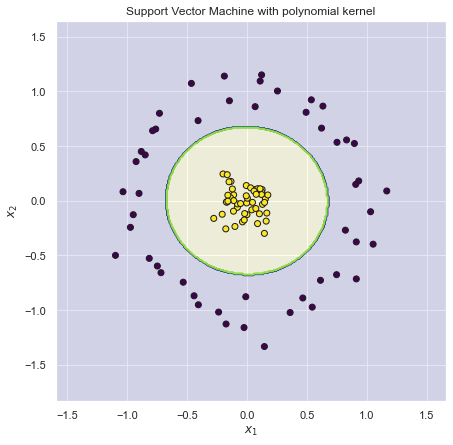

In [18]:
clf = SVC(kernel=my_kernel_3, C = 1)
# kernel computation
clf.fit(X, y) 

#Initialize data
h = .01 #Stepsize in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

#Predict on meshgrid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize = (7,7))
plt.contourf(xx, yy, Z,1, colors = ['darkblue','yellow'], alpha = .1)
plt.contour(xx, yy, Z, cmap = 'viridis')

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors = 'k')
plt.title('Support Vector Machine with polynomial'
          ' kernel')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')